# Basic statistics with pyclesperanto
A common use case for image processing in the biology context is deriving statistics of segmented objects. clEsperanto offers a function for that: [statistics_of_labelled_pixels](https://clij.github.io/clij2-docs/reference_statisticsOfLabelledPixels).

In [1]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.216.01
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24183 MB
	Maximum Object Size:         6045 MB
	Max Clock Frequency:         2520 MHz
	Image Support:               Yes

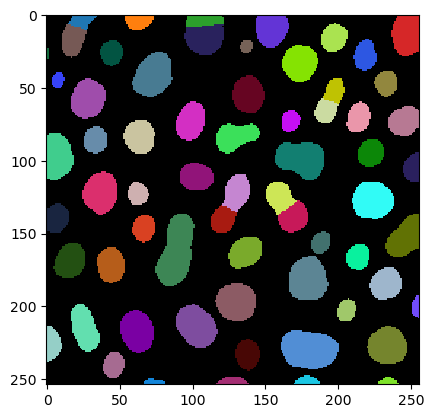

In [2]:
# load data
image = imread('https://samples.fiji.sc/blobs.png').squeeze()

# segment the image
labels = cle.voronoi_otsu_labeling(image, spot_sigma=3.5)
cle.imshow(labels, labels=True)

## Deriving basic statistics of labelled objects

In [3]:
statistics = cle.statistics_of_labelled_pixels(image, labels)
statistics.keys()

dict_keys(['max_distance_to_mass_center', 'mean_distance_to_centroid', 'mean_distance_to_mass_center', 'sum_distance_to_centroid', 'centroid_y', 'max_distance_to_centroid', 'sum_y', 'centroid_x', 'mass_center_z', 'mass_center_y', 'sum_intensity_times_y', 'standard_deviation_intensity', 'sum_intensity_times_z', 'mass_center_x', 'mean_max_distance_to_mass_center_ratio', 'sum_x', 'sum_intensity_times_x', 'mean_max_distance_to_centroid_ratio', 'mean_intensity', 'sum_intensity', 'max_intensity', 'min_intensity', 'area', 'bbox_height', 'sum_z', 'bbox_width', 'sum_distance_to_mass_center', 'bbox_depth', 'bbox_max_y', 'centroid_z', 'bbox_max_z', 'bbox_max_x', 'bbox_min_z', 'bbox_min_y', 'bbox_min_x', 'label'])

We can use [pandas](https://pandas.pydata.org/) to process that kind of tabular data. 

In [4]:
import pandas as pd

In [5]:
table = pd.DataFrame(statistics)
table

,max_distance_to_mass_center,mean_distance_to_centroid,mean_distance_to_mass_center,sum_distance_to_centroid,centroid_y,max_distance_to_centroid,sum_y,centroid_x,mass_center_z,mass_center_y,...,sum_distance_to_mass_center,bbox_depth,bbox_max_y,centroid_z,bbox_max_z,bbox_max_x,bbox_min_z,bbox_min_y,bbox_min_x,label
0,10.567422,4.846953,4.847507,678.573486,3.935714,10.434954,551.0,24.335714,0.0,3.880024,...,678.650879,1.0,10.0,0.0,0.0,34.0,0.0,0.0,15.0,1.0
1,11.036123,5.498612,5.502826,1000.747314,4.252748,10.937561,774.0,63.076923,0.0,4.168375,...,1001.514343,1.0,10.0,0.0,0.0,73.0,0.0,0.0,53.0,2.0
2,13.370183,6.848543,6.848228,1410.799805,3.689320,13.304141,760.0,107.898056,0.0,3.600840,...,1410.734985,1.0,8.0,0.0,0.0,121.0,0.0,0.0,96.0,3.0
3,15.264710,8.581803,8.594847,4084.937988,13.487395,15.775529,6420.0,246.817245,0.0,13.061510,...,4091.146729,1.0,28.0,0.0,0.0,255.0,0.0,0.0,237.0,4.0
4,13.623447,7.936928,7.938521,3468.437256,9.826088,13.730526,4294.0,154.409622,0.0,9.654298,...,3469.133545,1.0,22.0,0.0,0.0,166.0,0.0,0.0,144.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,9.025383,5.522641,5.522644,1165.277222,240.507111,9.018278,50747.0,46.033176,0.0,240.501328,...,1165.277710,1.0,249.0,0.0,0.0,53.0,0.0,232.0,39.0,61.0
61,7.518510,3.625922,3.627579,166.792419,251.891312,7.430996,11587.0,73.652176,0.0,252.004974,...,166.868637,1.0,253.0,0.0,0.0,81.0,0.0,250.0,67.0,62.0
62,10.679587,4.832870,4.838721,415.626831,251.313950,10.783784,21613.0,127.651161,0.0,251.419754,...,416.130005,1.0,253.0,0.0,0.0,138.0,0.0,249.0,117.0,63.0
63,8.737135,4.143342,4.155846,323.180725,251.102570,8.896990,19586.0,178.692307,0.0,251.248611,...,324.156006,1.0,253.0,0.0,0.0,187.0,0.0,248.0,170.0,64.0


In [6]:
table.describe()

,max_distance_to_mass_center,mean_distance_to_centroid,mean_distance_to_mass_center,sum_distance_to_centroid,centroid_y,max_distance_to_centroid,sum_y,centroid_x,mass_center_z,mass_center_y,...,sum_distance_to_mass_center,bbox_depth,bbox_max_y,centroid_z,bbox_max_z,bbox_max_x,bbox_min_z,bbox_min_y,bbox_min_x,label
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,65.000000,...,65.000000,65.0,65.000000,65.0,65.0,65.000000,65.0,65.000000,65.000000,65.00000
mean,12.052005,6.861953,6.864426,2702.932659,119.078100,12.040750,41248.676923,129.186267,0.0,119.034790,...,2703.714800,1.0,129.123077,0.0,0.0,138.523077,0.0,109.015385,119.784615,33.00000
std,3.818085,2.093566,2.093542,2297.335670,77.845037,3.793783,40920.515397,78.950803,0.0,77.882673,...,2297.556436,0.0,77.892656,0.0,0.0,79.092728,0.0,77.584529,78.592599,18.90767
min,4.797967,2.522214,2.522630,47.922073,3.689320,4.776695,498.000000,0.421053,0.0,3.600840,...,47.929977,1.0,8.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,1.00000
25%,9.337828,5.498612,5.502826,1104.808350,52.204300,9.368114,11587.000000,62.569065,0.0,52.115433,...,1104.831909,1.0,61.000000,0.0,0.0,73.000000,0.0,42.000000,53.000000,17.00000
50%,11.808653,6.736742,6.738640,1836.495361,121.965515,11.835219,29789.000000,130.477005,0.0,122.037941,...,1836.509155,1.0,130.000000,0.0,0.0,143.000000,0.0,108.000000,121.000000,33.00000
75%,14.051637,8.511447,8.506598,4038.744873,181.503067,14.076573,64288.000000,197.299637,0.0,181.416870,...,4039.096680,1.0,195.000000,0.0,0.0,204.000000,0.0,166.000000,189.000000,49.00000
max,26.960522,13.352557,13.349307,12003.949219,251.891312,26.360050,194202.000000,253.312500,0.0,252.004974,...,12001.027344,1.0,253.000000,0.0,0.0,255.000000,0.0,250.000000,251.000000,65.00000
